In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
from nltk.tokenize import word_tokenize

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
# Pre-trained glove path
glove_path = '/content/drive/MyDrive/CS289A Project/data/glove.6B.50d.txt'

# Train
# train_path = '/content/drive/MyDrive/CS289A Project/data/cleaned_mbti_train.csv'
train_path = '/content/drive/MyDrive/CS289A Project/data/old data (w o removing mbti words)/cleaned_mbti_train.csv'
# test_path = '/content/drive/MyDrive/CS289A Project/data/cleaned_mbti_test.csv'
test_path = '/content/drive/MyDrive/CS289A Project/data/old data (w o removing mbti words)/cleaned_mbti_test.csv'

In [4]:
def load_glove_model(File):
    print("Loading Glove Model")
    glove_model = {}
    with open(File,'r') as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array(split_line[1:], dtype=np.float64)
            glove_model[word] = embedding
    print(f"{len(glove_model)} words loaded!")
    return glove_model
  
glove_model = load_glove_model(glove_path)

Loading Glove Model
400000 words loaded!


In [5]:
embeddings_index = glove_model

In [6]:
glove_model['king']

array([ 0.50451 ,  0.68607 , -0.59517 , -0.022801,  0.60046 , -0.13498 ,
       -0.08813 ,  0.47377 , -0.61798 , -0.31012 , -0.076666,  1.493   ,
       -0.034189, -0.98173 ,  0.68229 ,  0.81722 , -0.51874 , -0.31503 ,
       -0.55809 ,  0.66421 ,  0.1961  , -0.13495 , -0.11476 , -0.30344 ,
        0.41177 , -2.223   , -1.0756  , -1.0783  , -0.34354 ,  0.33505 ,
        1.9927  , -0.04234 , -0.64319 ,  0.71125 ,  0.49159 ,  0.16754 ,
        0.34344 , -0.25663 , -0.8523  ,  0.1661  ,  0.40102 ,  1.1685  ,
       -1.0137  , -0.21585 , -0.15155 ,  0.78321 , -0.91241 , -1.6106  ,
       -0.64426 , -0.51042 ])

In [7]:
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)
df_train

,Unnamed: 0,type,posts,clean_word_counts,clean_posts
0,3798,ENTP,'I would imagine I would be the kid that needs...,757,imagine kid need parent get inside build diffi...
1,2825,INFJ,'Luckily there are some jobs out there where r...,620,luckily job reality marginally way spend work ...
2,3461,INTJ,"'I'm pretty sure you are an ISFJ. Firstly, yo...",660,pretty sure isfj firstly say relate always lea...
3,5471,ISFP,'when people look at you and automatically jud...,426,look automatically judge smoke pot hahaha howr...
4,4848,INTJ,"'If it satisfies your curiosity, I'm currently...",647,satisfies curiosity currently study medicine s...
...,...,...,...,...,...
6935,2597,ENFP,'Here's the ones I watch (the last three aren'...,623,here one watch last three arent popular funsie...
6936,7909,ENTP,"'Vainglorious, of course.|||You aren't describ...",583,vainglorious course arent describe crisis conf...
6937,3905,INFJ,"'Hmmm true true. Thanks|||Yes, that's a good p...",719,hmmm true true thanks yes thats good point dec...
6938,6957,INTJ,'I fucked up.|||I wish I could achieve my goal...,558,fuck wish could achieve goal within hour send ...


In [8]:
# train/test_pers_bin : splitted MBTI types
# I/E  N/S  F/T  J/P
pers = {'I':0, 'E':1, 'N':0, 'S':1, 'F':0, 'T':1, 'J':0, 'P':1}
def trans_per(mtype):
  return [pers[l] for l in mtype]

def bin_2_num(bin):
  res = 0; n = len(bin)
  for ielem, bin_val in enumerate(bin):
    res += bin_val*pow(2,n-1-ielem)
  return res

class16_mbti_map = {
    0:"INFJ",
    1:"INFP",
    2:"INTJ",
    3:"INTP",
    4:"ISFJ",
    5:"ISFP",
    6:"ISTJ",
    7:"ISTP",
    8:"ENFJ",
    9:"ENFP",
    10:"ENTJ",
    11:"ENTP",
    12:"ESFJ",
    13:"ESFP",
    14:"ESTJ",
    15:"ESTP",
}

# can train each personality
train_pers_bin = np.array([trans_per(p) for p in df_train.type])
# train_target
y_train = train_target = np.array([bin_2_num(bin) for bin in train_pers_bin])

# can train each personality
test_pers_bin = np.array([trans_per(p) for p in df_test.type])
# train_target
y_test = test_target = np.array([bin_2_num(bin) for bin in test_pers_bin])

In [9]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [10]:
def create_corpus(df): #method to tokenize tweets 
    corpus=[]
    for tweet in df['clean_posts']:
        words=[word.lower() for word in word_tokenize(tweet) if(word.isalpha()==1)]
        corpus.append(words)
    return corpus

In [11]:
corpus=create_corpus(df_train)

MAX_LEN=500
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences=tokenizer_obj.texts_to_sequences(corpus)

X_train = tweet_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

In [12]:
word_index=tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

word_index.items()



num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,50))

for word,i in word_index.items():
    if i > num_words:
        continue
    
    emb_vec=glove_model.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec

Number of unique words: 122353


In [13]:
corpus_test = create_corpus(df_test)

MAX_LEN=500
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus_test)
sequences=tokenizer_obj.texts_to_sequences(corpus_test)

X_test = tweet_pad_test=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

In [14]:
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

In [15]:
model=Sequential()

embedding=Embedding(num_words,50,embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False)

model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


optimzer=Adam(learning_rate=1e-5)

model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])

In [16]:
history=model.fit(X_train,y_train,batch_size=4,epochs=5,validation_data=(X_test,y_test),verbose=2)

Epoch 1/5
1735/1735 - 620s - loss: -1.7880e+00 - accuracy: 0.2065 - val_loss: -9.0421e+00 - val_accuracy: 0.2110 - 620s/epoch - 357ms/step
Epoch 2/5
1735/1735 - 598s - loss: -1.5921e+01 - accuracy: 0.2112 - val_loss: -2.1167e+01 - val_accuracy: 0.2110 - 598s/epoch - 345ms/step
Epoch 3/5
1735/1735 - 590s - loss: -2.4022e+01 - accuracy: 0.2112 - val_loss: -2.7100e+01 - val_accuracy: 0.2110 - 590s/epoch - 340ms/step
Epoch 4/5
1735/1735 - 592s - loss: -2.9384e+01 - accuracy: 0.2112 - val_loss: -3.1947e+01 - val_accuracy: 0.2110 - 592s/epoch - 341ms/step
Epoch 5/5
1735/1735 - 593s - loss: -3.3646e+01 - accuracy: 0.2112 - val_loss: -3.5733e+01 - val_accuracy: 0.2110 - 593s/epoch - 342ms/step


# Deprecated

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

best_logreg = LogisticRegression(C=0.1)

best_logreg.fit(tweet_pad, train_target)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=0.1)

In [ ]:
X_train

array([[ 440,  220,   38, ...,    0,    0,    0],
       [2734,  204,  540, ...,    0,    0,    0],
       [  53,   48, 2716, ...,    0,    0,    0],
       ...,
       [1177,  155,  155, ...,    0,    0,    0],
       [ 320,  218,   37, ...,    0,    0,    0],
       [2120,  102,  266, ...,    0,    0,    0]], dtype=int32)

In [ ]:
y_pred = best_logreg.predict(tweet_pad_test)

In [ ]:
from sklearn.metrics import classification_report
print('train classification report \n ',classification_report(y_train,best_logreg.predict(X_train),target_names=list(class16_mbti_map.values())))
print('test classification report \n ',classification_report(y_test,y_pred,target_names=list(class16_mbti_map.values())))

train classification report 
                precision    recall  f1-score   support

        INFJ       0.45      0.45      0.45      1176
        INFP       0.46      0.49      0.47      1466
        INTJ       0.43      0.38      0.41       873
        INTP       0.42      0.39      0.40      1043
        ISFJ       0.80      0.89      0.85       133
        ISFP       0.53      0.61      0.57       217
        ISTJ       0.65      0.79      0.71       164
        ISTP       0.52      0.55      0.53       270
        ENFJ       0.73      0.86      0.79       152
        ENFP       0.50      0.46      0.48       540
        ENTJ       0.60      0.70      0.65       185
        ENTP       0.42      0.37      0.39       548
        ESFJ       0.97      1.00      0.99        33
        ESFP       0.95      1.00      0.97        38
        ESTJ       0.97      1.00      0.98        31
        ESTP       0.97      0.97      0.97        71

    accuracy                           0.49      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# ## Code adapted from (https://github.com/keras-team/keras/blob/master/examples/pretrained_word_embeddings.py)
# # Vectorize the text samples

# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.utils import to_categorical

# MAX_NUM_WORDS = 1000
# MAX_SEQUENCE_LENGTH = 100
# tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
# tokenizer.fit_on_texts(texts)
# sequences = tokenizer.texts_to_sequences(texts)

# word_index = tokenizer.word_index
# print('Found %s unique tokens.' % len(word_index))

# data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

# labels = to_categorical(np.asarray(train_target))
# print(data.shape)
# print(labels.shape)

Found 159254 unique tokens.
(8675, 100)
(8675, 16)


In [ ]:
# ## More code adapted from the keras reference (https://github.com/keras-team/keras/blob/master/examples/pretrained_word_embeddings.py)
# # prepare embedding matrix 
# from keras.layers import Embedding
# from keras.initializers import Constant

# ## EMBEDDING_DIM =  ## seems to need to match the embeddings_index dimension
# EMBEDDING_DIM = embeddings_index.get('a').shape[0]
# num_words = min(MAX_NUM_WORDS, len(word_index)) + 1
# embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
# for word, i in word_index.items():
#     if i > MAX_NUM_WORDS:
#         continue
#     embedding_vector = embeddings_index.get(word) ## This references the loaded embeddings dictionary
#     if embedding_vector is not None:
#         # words not found in embedding index will be all-zeros.
#         embedding_matrix[i] = embedding_vector

# # load pre-trained word embeddings into an Embedding layer
# # note that we set trainable = False so as to keep the embeddings fixed
# embedding_layer = Embedding(num_words,
#                             EMBEDDING_DIM,
#                             embeddings_initializer=Constant(embedding_matrix),
#                             input_length=MAX_SEQUENCE_LENGTH,
#                             trainable=False)

(1001, 50)


Text(0.5, 1.0, 'example vectors')

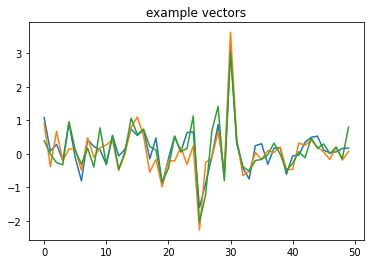

In [ ]:
# ## Peeking at the embedding matrix values
# print(embedding_matrix.shape)
# plt.plot(embedding_matrix[16])
# plt.plot(embedding_matrix[37])
# plt.plot(embedding_matrix[18])
# plt.title('example vectors')

In [ ]:
# ## Code from: https://medium.com/@sabber/classifying-yelp-review-comments-using-cnn-lstm-and-pre-trained-glove-word-embeddings-part-3-53fcea9a17fa
# ## To create and visualize a model

# from keras.models import Sequential
# from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation

# model = Sequential()
# model.add(Embedding(num_words, 50, input_length=100, weights= [embedding_matrix], trainable=False))

# model.add(Dropout(0.2))
# model.add(Conv1D(64, 5, activation='relu'))
# model.add(MaxPooling1D(pool_size=4))
# model.add(LSTM(100))
# model.add(Dense(2, activation='sigmoid'))

# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# ## Fit train data
# print(labels.shape)
# model.fit(data, np.array(labels), validation_split=0.1, epochs = 1)